In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler



from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import catboost as cb

In [2]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [3]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#firstly we need to rename the columns 
column_names=['sepal length','sepal width','petal length','petal width','species']

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=column_names)

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#check datatyples

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#check for null

df.isnull().values.any()

False

In [17]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
counts=[0,0,0]
for i in df.species:
    if i=='Iris-setosa':
        counts[0]+=1
    elif i=='Iris-versicolor':
        counts[1]+=1
    elif i=='Iris-virginica':
        counts[2]+=1
print(counts)

#all equal which is good although small dataset

[50, 50, 50]


In [21]:
setosa_data=df.loc[df.species=='Iris-setosa']
versicolor_data=df.loc[df.species=='Iris-versicolor']
virginica_data=df.loc[df.species=='Iris-virginica']
    

In [22]:
setosa_data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
datasets=[setosa_data,versicolor_data,virginica_data]

def plotter(attribute):
    for i in datasets:
        i.sort_values(by=attribute)
    plt.plot(setosa_data[attribute],color='r',label='setosa')
    plt.plot(versicolor_data[attribute],color='g',label='versicolor')
    plt.plot(virginica_data[attribute],color='b',label='viriginica')
    plt.xlabel("index")
    plt.ylabel("cm")
    plt.title(attribute)
    plt.legend()
    plt.show()
    
    

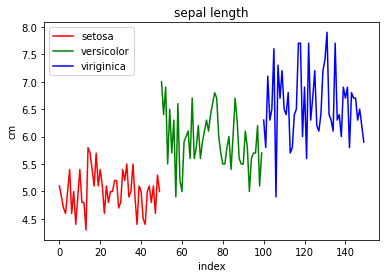

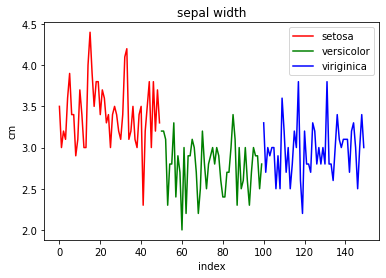

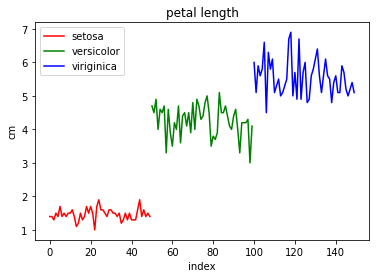

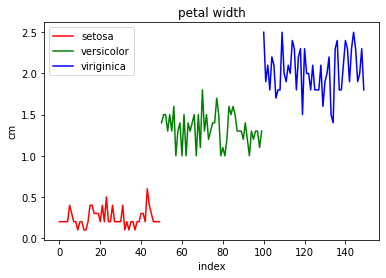

In [28]:
ats=['sepal length','sepal width','petal length','petal width']

for i in ats:
    plotter(i)

In [ ]:
#dataset has clear changes between the flower species will be good for a decision tree or nearest neighbour.

In [36]:
label_encoding = LabelEncoder()
for i in df.columns :
    df[i] = label_encoding.fit_transform(df[i])
    
df.tail()

,sepal length,sepal width,petal length,petal width,species
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2
149,16,9,27,14,2


In [38]:
X = df.drop('species', axis = 1)
y = df.species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [47]:
def modeller(name, X_train, X_test, y_train, y_test) :
    print("ooooooooooooooooooooooooooooooooooooooooooooooo")
    print("Model in use :", name)
    print()
        
    if name == "Random Forest Classifier" :
        model = RandomForestClassifier(
            n_estimators=1000, 
        )
    elif name == "Extra Trees Classifier" :
        model = ExtraTreesClassifier(
            n_estimators=1000, 
        )
    elif name == "XGBoost Classifier" :
        model = xgb.XGBClassifier(
            n_estimators=1000, 
        )
    elif name == "KNeighbors" :
        model = KNeighborsClassifier(
            n_neighbors=5
        )
    model.fit(X_train, y_train)
    
    val_pred = model.predict(X_test)
    print(classification_report(y_test, val_pred))
    print()
    print("Accuracy :", accuracy_score(y_test, val_pred))
    
    print("ooooooooooooooooooooooooooooooooooooooooooooooo")
    print()

In [48]:
models_to_use = ["Random Forest Classifier", "Extra Trees Classifier", "XGBoost Classifier","KNeighbors"]
for i in models_to_use :
    modeller(i, X_train, X_test, y_train, y_test)

ooooooooooooooooooooooooooooooooooooooooooooooo
Model in use : Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy : 1.0
ooooooooooooooooooooooooooooooooooooooooooooooo

ooooooooooooooooooooooooooooooooooooooooooooooo
Model in use : Extra Trees Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        3

In [ ]:
#random forest highest accuracy but there is worry of overfitting but we do not have a large data set so this is exprctrf

In [ ]:
final_mod.fit(X_train, y_train)
val_pred = model.predict(X_test)

In [51]:
final_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=column_names)

In [54]:
X = final_data.drop('species', axis = 1)
y = final_data.species
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [75]:
final_mod= ExtraTreesClassifier(n_estimators=1000)
final_mod.fit(X_train2, y_train2)
val_pred = final_mod.predict(X_test2)
print(val_pred)
print(X_test2)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']
     sepal length  sepal width  petal length  petal width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.9           6.3          1.8
7             5.0          3.4           1.5          0.2
100           6.3          3.3           6.0          2.5
40            5.0          3.5           1.3          0.3
86            6.7          3.1       